In [381]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')
import math

In [314]:
# unemployment rate in the US from the year of 1948 to 2017

In [315]:
df = pd.read_excel('USA umemployment rate 1948-2017.xlsx')

In [316]:
df.head()

,Year,Period,Value
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [317]:
# change the name 'value' to 'unemployment rate'.
df = df.rename(columns={'Value':'Unemployment Rate'})

In [318]:
df.head()

,Year,Period,Unemployment Rate
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [319]:
# create a new table for each year and its average unemployment rate

In [320]:
# 1, easy way
date=df.set_index('Year').groupby('Year').mean()
date.head()

,Unemployment Rate
Year,
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000


In [321]:
# 2, fun way
data = pd.DataFrame(df['Year'].unique(), columns=['Year'])
data.head()

,Year
0,1948
1,1949
2,1950
3,1951
4,1952


In [322]:
# find the avg unemployment rate for every year. sum the rate of every 12 months and find its mean
sum=0
avg=[]
n=0
for x in range(len(data)):
    for y in range(n,len(df)):
        if(df['Year'][y] == data['Year'][x]):
            sum += df['Unemployment Rate'][y]
        else:
            avg.append(sum/12)
            n=y
            sum=0
            break
        if(y == 839): # y will never reach 840, so without this condition, the else condition above will not be activate
            avg.append((sum/12))

In [323]:
avg[0:5]

[3.75,
 6.0499999999999998,
 5.208333333333333,
 3.2833333333333337,
 3.0250000000000004]

In [324]:
# combine the data
data['Unemployment Rate'] = pd.DataFrame(avg, columns=['Unemployment Rate'])

# round the rate to 2 decimal place
data['Unemployment Rate'] = data['Unemployment Rate'].round(2)

In [325]:
data.head()

,Year,Unemployment Rate
0,1948,3.75
1,1949,6.05
2,1950,5.21
3,1951,3.28
4,1952,3.03


In [326]:
# graph the data

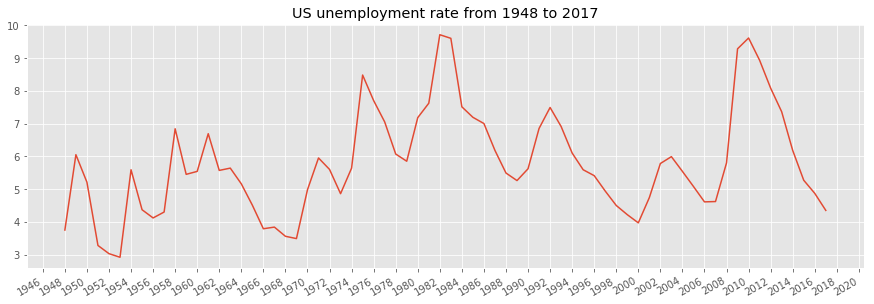

In [327]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data['Year'], data['Unemployment Rate'])

# show the year with more detail
ax.locator_params(nbins=70, axis='x')

# italic the values in the x axis
fig.autofmt_xdate()

plt.title('US unemployment rate from 1948 to 2017')
plt.show()

In [328]:
# recessions in the 1980s and around 2009

In [329]:
# we need to log transform the ‘y’ variable to a try to convert non-stationary data to stationary. 
# This also converts trends to more linear trends 

data['Unemployment Rate'] = np.log(data['Unemployment Rate'])
data.head()

,Year,Unemployment Rate
0,1948,1.321756
1,1949,1.800058
2,1950,1.650580
3,1951,1.187843
4,1952,1.108563


In [345]:
data_set = data['Unemployment Rate'].values

In [350]:
len(data_set)

70

In [346]:
# There are 70 years data, and I will use every 30 years to predict the unemploment rate in the 31th year.

In [347]:
training_set = data_set[:50]

In [348]:
# prepare the training data, use every 30 data to predict the 31th. 0-29 -> 30, and 1-30 -> 31, ...
X_train = []
y_train = []
for i in range(30, len(training_set)):
    X_train.append(training_set[i-30:i])
    y_train.append(training_set[i])

In [352]:
# prepare the test set. Here will use the last 30 values in the training set to predic the first value in the test set
test_set = data_set[20:] # last 50 values
X_test = []
y_test = data_set[50:]
for i in range(30, 50):
    X_test.append(training_set[i-30:i]) # the first value here is the 20th value in data_set


In [353]:
from sklearn.linear_model import LinearRegression

In [354]:
lrm = LinearRegression()

In [497]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [356]:
pred_lrm = lrm.predict(X_test)

In [449]:
# reverse the values from log
for i in range(20):
    y_test[i] = math.exp(y_test[i])
    pred_lrm[i] = math.exp(pred_lrm[i])

In [482]:
# last 20 years
L20y = data['Year'][50:]

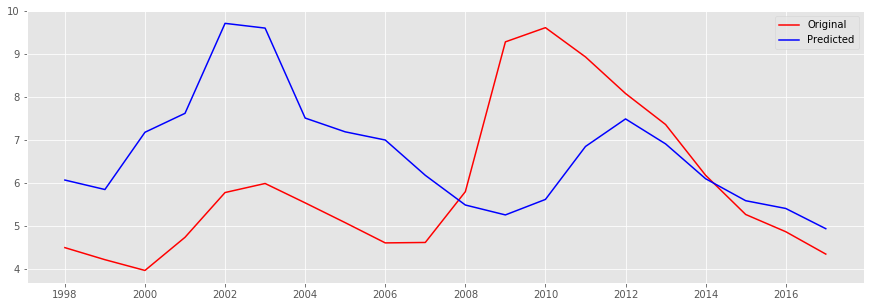

In [486]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_lrm, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

# looks like the trend is shifted. Expecially the time during the recession

In [500]:
from sklearn.neighbors import KNeighborsRegressor

In [501]:
knn = KNeighborsRegressor(n_neighbors=1)

In [502]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [503]:
pred_knn = knn.predict(X_test)

In [504]:
for i in range(20):
    pred_knn[i] = math.exp(pred_knn[i])

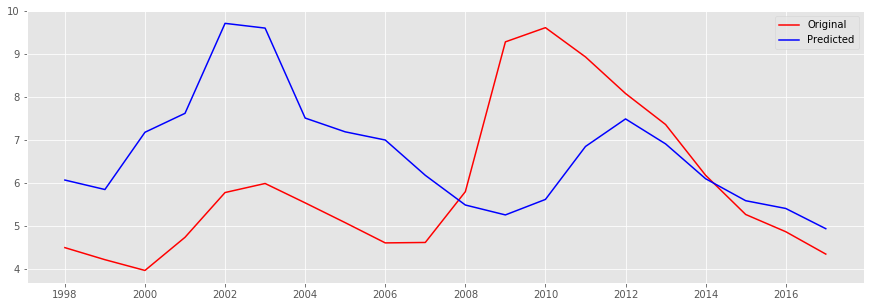

In [505]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_knn, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [506]:
from sklearn.tree import DecisionTreeRegressor

In [507]:
tree = DecisionTreeRegressor()

In [508]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [509]:
pred_tree = tree.predict(X_test)

In [510]:
for i in range(20):
    pred_tree[i] = math.exp(pred_tree[i])

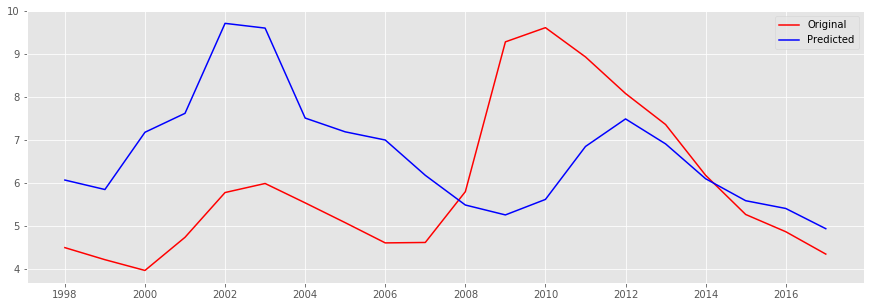

In [517]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_tree, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [512]:
from sklearn.ensemble import RandomForestRegressor

In [513]:
rfr = RandomForestRegressor(n_jobs=100)

In [514]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [515]:
pred_rfr = rfr.predict(X_test)

In [516]:
for i in range(20):
    pred_rfr[i] = math.exp(pred_rfr[i])

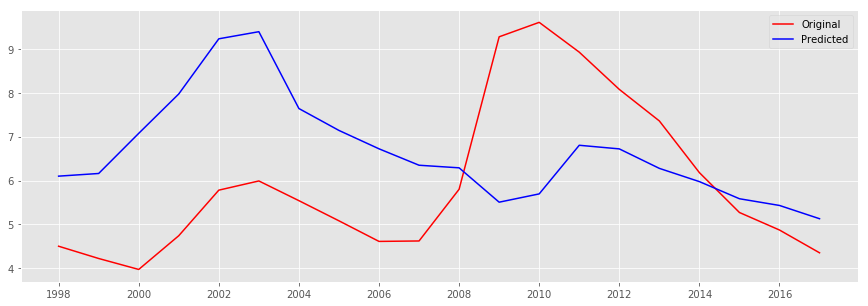

In [518]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_rfr, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [519]:
from sklearn.svm import SVR

In [520]:
svr = SVR()

In [521]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [522]:
pred_svr = svr.predict(X_test)

In [523]:
for i in range(20):
    pred_svr[i] = math.exp(pred_svr[i])

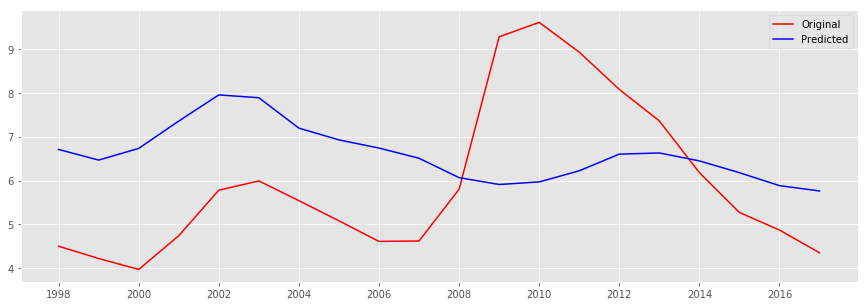

In [524]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_svr, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

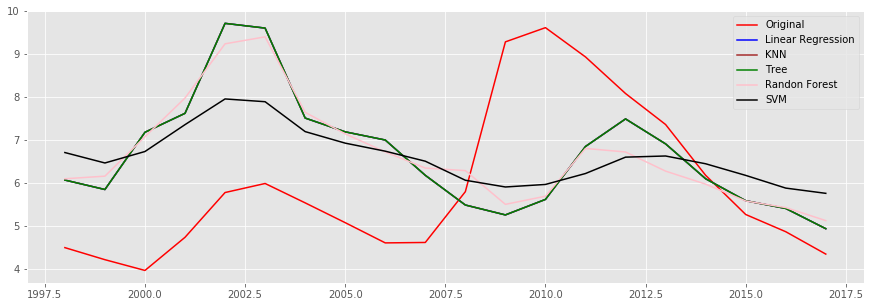

In [527]:
fig,ax = plt.subplots(figsize=(15,5))
a, = ax.plot(L20y, y_test, color='red')
b, = ax.plot(L20y, pred_lrm, color='blue')
c, = ax.plot(L20y, pred_knn, color='brown')
d, = ax.plot(L20y, pred_tree, color='green')
e, = ax.plot(L20y, pred_rfr, color='pink')
f, = ax.plot(L20y, pred_svr, color='black')
plt.legend([a,b, c,d,e,f],['Original','Linear Regression', 'KNN', 'Tree', 'Randon Forest', 'SVM'])